1.导入包

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

%matplotlib inline

E:\ProgramData\miniconda\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


2.导入数据集


In [5]:
wine = load_wine()

In [9]:
wine.data  # 特征矩阵
wine.data.shape
wind.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

3.复习：sklearn建模的基本流程

In [10]:
# 实例化
# fit
# 其他接口，将测试集导入我们训练好的模型：score， Y_test

from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [12]:
clf = DecisionTreeClassifier(random_state=0)  # 控制随机性
rfc = RandomForestClassifier(random_state=0)  # 一片固定的森林

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtest, Ytest)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

print("Single Tree:{}".format(score_c))
print("Random Forest:{}".format(score_r))

Single Tree:0.9444444444444444
Random Forest:1.0


4.画出随机森林和决策树在一组交叉验证下的效果对比

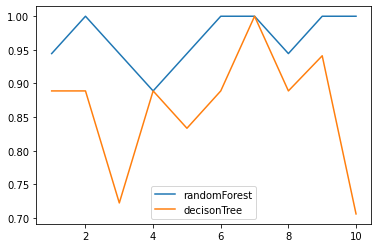

In [15]:
# 交叉验证:有了测试集和验证集，我们就不用自己分测试集和验证集了
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=10)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s, label="randomForest")
plt.plot(range(1,11), clf_s, label="decisonTree")
plt.legend()

RandomForest
0.9830065359477125
DecisionTee
0.8761437908496731


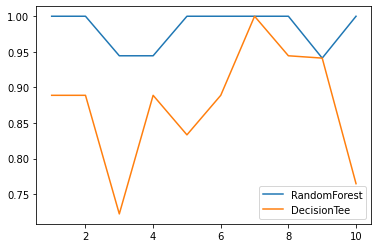

In [17]:
# 一种更加有趣的写法：嵌套写法
# 不会写的时候，一步一步写，会写的时候随便写

label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
    score = cross_val_score(model, wine.data, wine.target, cv=10)
    print("{}".format(label)), print(score.mean())
    plt.plot(range(1, 11), score, label=label)
    plt.legend()
    label = "DecisionTee"

5.画出随机森林和决策树在十组交叉验证下的效果对比

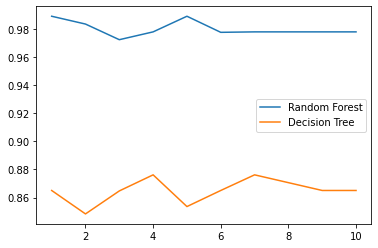

In [19]:
# 这个只是体会集成算法的优势，不必要在实际中使用

rfc_1 = []
clf_1 = []

# 循环十次，每次进行10次交叉验证
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_1.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11), rfc_1, label = "Random Forest")
plt.plot(range(1,11), clf_1, label = "Decision Tree")
plt.legend() 
plt.show()

6.n_estimators 的学习曲线

0.9944444444444445 27


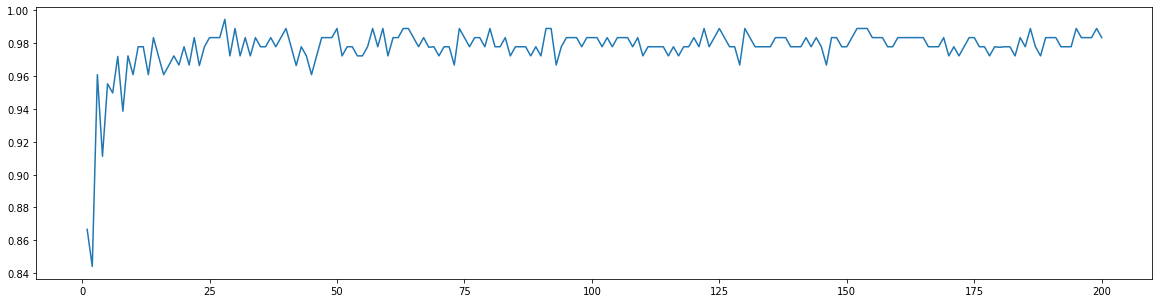

In [18]:
# 要跑两分钟
# 从1棵树到200棵树的集成
# 找到整个过程中最高的准确率和最高的准确率出现的位置
# list.index(object) : 对象object在列表中的索引

superpa = []  # 记录交叉验证的结果
for i in range(200):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)
    
print(max(superpa), superpa.index(max(superpa)))
plt.figure(figsize=[20, 5])
plt.plot(range(1,201),superpa)
plt.show()

In [25]:
rfc = RandomForestClassifier(n_estimators=10, random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [30]:
# estimators_ 查看森林中所有树的状况
rfc.estimators_
rfc.estimators_[0]

#  循环列出所有的random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511


# 随机森林中的两种重要属性
- boostrap：随机有放回抽取，数据被抽到的概率：0.63，默认为True
- oob：out of bag data：随机有放回抽取在一次抽样中没有抽到的数据集合：0.37,默认为False，可以用oob_score来查看袋外数据测试的结果

In [32]:
# 无需划分训练集和测试集

rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

# 重要属性oob_score_
rfc.oob_score_

0.9719101123595506

# 重要接口（返回结果的途径）
- n_estimators
- random_state
- boostrap
- oob_score
- predict_proba

- 与决策树形同的接口
- apply
- fit
- predict
- score


# 两个重要属性
- .estimators_
- .oob_score_


In [34]:
rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(Xtrain, Ytrain)

In [35]:
rfc.score(Xtrain, Ytrain)

1.0

In [36]:
rfc.feature_importances_

array([0.1373266 , 0.0172041 , 0.02107333, 0.01370102, 0.01191028,
       0.03534961, 0.15303417, 0.01204023, 0.03465464, 0.10885579,
       0.06728014, 0.23756201, 0.15000809])

In [37]:
rfc.apply(Xtest)   # 返回索引

array([[14, 10, 14,  9, 15, 14, 20, 12, 13, 15],
       [ 5,  3, 13,  7, 10, 14, 20,  8,  5,  9],
       [ 5, 10, 13,  7, 11, 14, 20,  8,  5, 11],
       [14, 10, 14,  9, 15, 14, 20, 12, 13, 15],
       [14,  9, 14,  1, 11, 14, 20,  8, 13, 11],
       [ 5,  1,  6,  7, 11, 11, 15,  8,  5, 11],
       [ 8,  3,  9,  3,  4,  3, 15,  3,  9,  4],
       [14, 10, 14,  9, 15, 14, 20, 12, 13, 15],
       [ 8,  3,  9,  3, 10,  3, 14,  6,  9,  4],
       [14, 10, 14,  5, 15, 14, 20, 12, 13, 15],
       [ 5,  1,  6,  1, 11,  6, 15,  8,  5, 11],
       [14, 10,  9,  9, 13, 14,  6, 12, 13, 15],
       [10,  9,  8,  3, 11,  3, 15,  3,  9,  4],
       [14, 10, 14,  9, 15, 14, 20, 12, 13, 15],
       [ 5,  1,  6,  3, 11,  2, 15,  3,  5, 11],
       [ 5,  1,  6,  5, 11,  6, 15,  8,  5, 11],
       [10,  6,  9,  3,  7,  3, 14,  3,  9,  6],
       [ 5,  1,  6,  1, 11,  6,  6,  8,  5, 11],
       [14, 10, 14,  9, 15, 14, 20, 12, 13, 15],
       [ 5,  1, 13,  5, 11,  6, 17,  8,  5, 11],
       [14,  1, 14, 

In [38]:
rfc.predict(Xtest)  # 返回预测的标签
rfc.predict_proba(Xtest)  # 每一个样本对应每一个标签的概率

array([[1. , 0. , 0. ],
       [0.2, 0.6, 0.2],
       [0.3, 0.7, 0. ],
       [1. , 0. , 0. ],
       [0.5, 0.5, 0. ],
       [0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0.9, 0.1, 0. ],
       [0. , 1. , 0. ],
       [0.7, 0.2, 0.1],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0.3, 0.7, 0. ],
       [0. , 0.1, 0.9],
       [0. , 0.9, 0.1],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0.3, 0.7, 0. ],
       [1. , 0. , 0. ],
       [0. , 0.3, 0.7],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0.2, 0.8, 0. ],
       [0.1, 0.9, 0. ],
       [0. , 0.7, 0.3],
       [0. , 0.1, 0.9],
       [0.1, 0.5, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.1, 0.9],
       [0.3, 0.6, 0.1],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. 